# MLP (Multilayer Perceptron)

- Obs : Dataset" (conjunto de dados) se refere à base de dados que é usada para treinar, testar ou avaliar modelos de aprendizado de máquina ou algoritmos de análise de dados. 

## Backpropagation
Durante o treinamento com o algoritmo backpropagation, a rede opera em uma sequência de dois passos. Primeiro, um padrão é apresentado à camada de entrada da rede. A atividade resultante flui através da rede, camada por camada, até que a resposta seja produzida pela camada de saída. No segundo passo, a saída obtida é comparada à saída desejada para esse padrão particular. Se esta não estiver correta, o erro é calculado. O erro é propagado a partir da camada de saída até a camada de entrada, e os pesos das conexões das unidades das camadas internas vão sendo modificados conforme o erro é retropropagado.

## Fases
- Treinamento
- Teste
- Overfitting

# XOR 

In [3]:
#Perceptron (https://www.youtube.com/watch?v=fEukSrpDPH0&list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY&index=9)

import numpy as np

class Perceptron(object) :
    def __init__(self, qtd_inputs, learning_rate = 0.5, num_epochs = 100, bias = 0) :
        self.weights = np.zeros(qtd_inputs) # Cria um array de zeros com tamanho informado
        self.num_inputs = qtd_inputs
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.bias = bias

    # Grep - Função de Ativação
    def activate(self, x) :
        return 1 if x >= 0 else 0

    # Produto Escalar
    def predict(self, inputs) :
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)
    
    # Treinamento
    def train(self, training_data, labels):
        for _ in range(self.num_epochs):
            for i in range(len(training_data)):
                prediction = self.predict(training_data[i])
                error = labels[i] - prediction
                self.weights += self.learning_rate * error * training_data[i]
                self.bias += self.learning_rate * error
                

In [4]:
datas = np.array([
    [0.,0.],
    [0.,1.],
    [1.,0.],
    [1.,1.]
    ])

labelsOR = np.array([0.,1.,1.,1.])
labelsNAND = np.array([1.,1.,1.,0.])
labelsAND = np.array([0.,0.,0.,1.])

perceptronOR = Perceptron(qtd_inputs=2) 
perceptronNAND = Perceptron(qtd_inputs=2) 
perceptronAND = Perceptron(qtd_inputs=2)

perceptronOR.train(datas, labelsOR)
perceptronNAND.train(datas, labelsNAND)
perceptronAND.train(datas, labelsAND)

test_data = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
for data_point in test_data:
    predictionOR = perceptronOR.predict(data_point)
    predictionNAND = perceptronNAND.predict(data_point)
    listPredict = [predictionOR, predictionNAND]
    print(f"Input: {data_point}, Prediction: {perceptronAND.predict(listPredict)}")

Input: [0. 0.], Prediction: 0
Input: [0. 1.], Prediction: 1
Input: [1. 0.], Prediction: 1
Input: [1. 1.], Prediction: 0


# Pytorch
Iris

In [5]:
# Criando modelo de MLP

import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module) :

    # 4 Entradas (4 Caracteristicas da Flor)
    # 2 Camadas de Neuronios ()
    # 3 Saidas (3 Classes de Flores)

    def __init__(self, in_features=4, hiddenLayer1 = 8, hidderLayer2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hiddenLayer1)
        self.fc2 = nn.Linear(hiddenLayer1, hidderLayer2)
        self.output = nn.Linear(hidderLayer2, out_features)

    def forward(self, x) :
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


In [6]:
torch.manual_seed(41)
model = Model()

In [7]:
#Importando Biblioteca
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Carregando dados (Planilha)
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
# Alterando dados categóricos para numéricos
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
# Dividindo Entradas e Labels
x = df.drop('variety', axis=1) # Dados para Treinamento
y = df['variety'] # Labels

In [11]:
# Converter numeros para array
x = x.values
y = y.values

In [12]:
# Dividindo dados de treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [13]:
# Convertendo dados para tipos recomendaveis
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

In [14]:
# Definindo criterio para mensurar o erro e Learning Rate 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Treinando o modelo
epochs = 100
losses = []
for i in range(epochs) :
    y_pred = model.forward(x_train) # Pegando a previsão
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0 :
        print(f'Época {i} e Erro : {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Época 0 e Erro : 1.125203251838684
Época 10 e Erro : 1.0097211599349976
Época 20 e Erro : 0.8162347078323364
Época 30 e Erro : 0.585993230342865
Época 40 e Erro : 0.4003389775753021
Época 50 e Erro : 0.26794716715812683
Época 60 e Erro : 0.1796349734067917
Época 70 e Erro : 0.12165626138448715
Época 80 e Erro : 0.08606516569852829
Época 90 e Erro : 0.06522615253925323


Text(0.5, 0, 'Épocas')

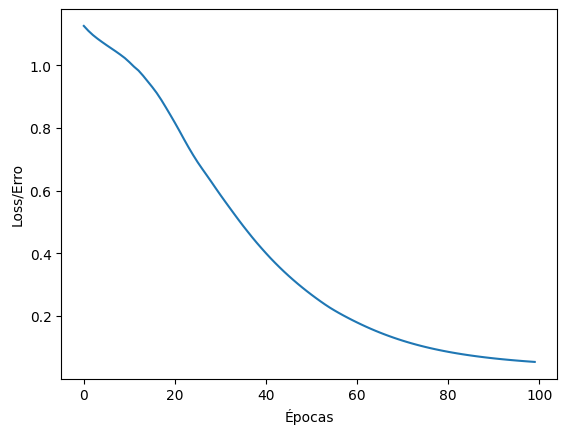

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Erro')
plt.xlabel('Épocas')

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

class_predict = model(x_test)
class_predict = class_predict.argmax(axis=1)
confusion_matriz = confusion_matrix(y_test, class_predict, labels=range(3))
confusion_matriz

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)